In [1]:
# We'll start with testing based on this blogpost by /u/dvk0:
# https://dannyvankooten.com/backtesting-12-month-sma-investing-strategy-pandas/

In [16]:
%matplotlib inline
import pandas as pd

sp500 = pd.read_csv('data/SP500-Yahoo.csv', sep=',', parse_dates=True, index_col='Date', usecols=['Adj Close', 'Date'])
sp500.head()

,Adj Close
Date,
1950-01-01,17.049999
1950-02-01,17.219999
1950-03-01,17.290001
1950-04-01,18.070000
1950-05-01,18.780001


In [17]:
sp500['Yield'] = sp500['Adj Close'].pct_change()
sp500['SMA 365'] = sp500['Adj Close'].rolling(window=12).mean()
sp500.dropna().head()

,Adj Close,Yield,SMA 365
Date,,,
1950-12-01,20.410000,0.046130,18.438334
1951-01-01,21.660000,0.061244,18.822500
1951-02-01,21.799999,0.006463,19.204167
1951-03-01,21.400000,-0.018349,19.546667
1951-04-01,22.430000,0.048131,19.910000


In [18]:
sp500['Criteria'] = sp500['Adj Close'] >= sp500['SMA 365'] 
sp500['Criteria'].value_counts() 

True     592
False    237
Name: Criteria, dtype: int64

In [19]:
sp500['Buy & Hold'] = 100 * (1 + sp500['Yield']).cumprod()
sp500['Trend'] = 100 * (1 + ( sp500['Criteria'].shift(1) * sp500['Yield'] )).cumprod()

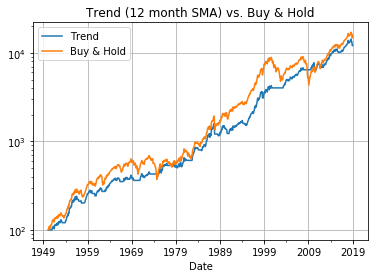

In [20]:
ax = sp500[['Trend', 'Buy & Hold']].plot(grid=True, kind='line', title="Trend (12 month SMA) vs. Buy & Hold", logy=True)